# Descriptive Statistics in Python


In this notebook I will demonstrate how to obtain some descriptive statistics using various software libraries in python. These will be the most common measures of centre (mean, median, mode) and spread (variance, standard deviation) that we might be interested in obtaining when we start to explore and analyse a dataset. 

### Measures of centre

In [1]:
# Firstly, we need to import software libraries. 

%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Importing the dataset and saving it as a python object.

weight = pd.read_csv("weight_data.csv")

In [6]:
# Checking the data has imported correctly by asking for the head of the dataframe (first six lines). 

weight.head()

,Unnamed: 0,SubjectID,Weight,Height,Leg.length,Age,Sex
0,1,4885,81.5,182.3,110.0,32,Male
1,2,15016,88.8,182.6,110.8,30,Male
2,3,25895,45.5,167.3,101.7,20,Female
3,4,11885,85.4,180.3,115.0,19,Male
4,5,19382,72.8,170.5,106.5,26,Female


In [7]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     int64  
 1   SubjectID   50 non-null     int64  
 2   Weight      50 non-null     float64
 3   Height      50 non-null     float64
 4   Leg.length  50 non-null     float64
 5   Age         50 non-null     int64  
 6   Sex         50 non-null     object 
dtypes: float64(3), int64(3), object(1)
memory usage: 2.9+ KB


In [11]:
# To obtain the mean for each variable use variable_name.mean()

weight.mean()

C:\Users\robert65\AppData\Local\Temp\ipykernel_6448\414643622.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weight.mean()


Unnamed: 0       25.500
SubjectID     15813.740
Weight           68.368
Height          169.570
Leg.length      104.948
Age              25.860
dtype: float64

In [9]:
# To just obtain medians for variables

weight.median()

C:\Users\robert65\AppData\Local\Temp\ipykernel_6448\653628387.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weight.median()


Unnamed: 0       25.50
SubjectID     17888.00
Weight           66.55
Height          169.75
Leg.length      104.60
Age              25.00
dtype: float64

In [12]:
# To select individual columns/ variables from the data frame.
# Create a new object first for the variable of interest. 

ages = weight["Age"]

# Then check the variable selected has worked:

ages.head()

0    32
1    30
2    20
3    19
4    26
Name: Age, dtype: int64

In [13]:
# Can then ask for specific descriptives for that variable:
# Note the syntax, object_name.measure()
ages.mean()

25.86

In [14]:
ages.median()

25.0

In [15]:
# I am interested in getting descriptives for multiple variables in the dataframe:
# Create an object with a useful name (these are all the scale variables) so I will use
# weight_scale as the object name. Note the double brackets this time. 

weight_scale = weight[["Weight", "Height", "Leg.length", "Age"]] 

In [16]:
weight_scale.head()

,Weight,Height,Leg.length,Age
0,81.5,182.3,110.0,32
1,88.8,182.6,110.8,30
2,45.5,167.3,101.7,20
3,85.4,180.3,115.0,19
4,72.8,170.5,106.5,26


In [17]:
# Obtaining mean for the weight_scale object variables

weight_scale.mean()

Weight         68.368
Height        169.570
Leg.length    104.948
Age            25.860
dtype: float64

In [18]:
# And the medians

weight_scale.median()

Weight         66.55
Height        169.75
Leg.length    104.60
Age            25.00
dtype: float64

In [19]:
# You can select specific rows from the dataframe. For example, everyone over 30:

above_30 = weight[weight["Age"] > 30]

In [22]:
# Check using the object.head() method:

above_30.head()

,Unnamed: 0,SubjectID,Weight,Height,Leg.length,Age,Sex
0,1,4885,81.5,182.3,110.0,32,Male
8,9,13127,60.3,166.4,103.7,31,Female
15,16,25198,54.6,158.4,100.4,33,Female
17,18,8389,48.0,163.7,101.0,33,Female
25,26,19246,58.4,154.3,97.7,36,Female


(array([12.,  7.,  2.,  9.,  4.,  4.,  3.,  4.,  4.,  1.]),
 array([19. , 20.9, 22.8, 24.7, 26.6, 28.5, 30.4, 32.3, 34.2, 36.1, 38. ]),
 <BarContainer object of 10 artists>)

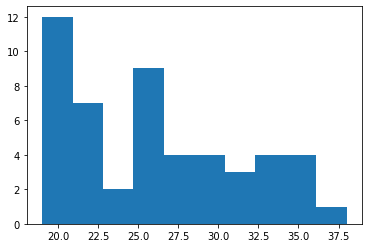

In [23]:
# Here we can obtain a histogram using matplotlib for the ages object:

plt.hist(ages)

In [24]:
# Creating an object for the Weight variable:

weighs = weight["Weight"]

(array([ 2.,  7.,  7., 10., 10.,  4.,  3.,  5.,  1.,  1.]),
 array([ 45.5 ,  51.11,  56.72,  62.33,  67.94,  73.55,  79.16,  84.77,
         90.38,  95.99, 101.6 ]),
 <BarContainer object of 10 artists>)

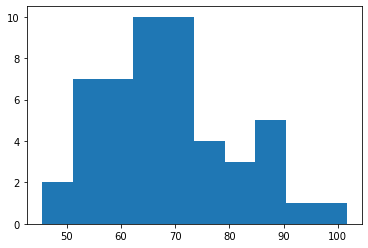

In [27]:
plt.hist(weighs)

In [28]:
# An alternative way to get the mean. Using the numpy software library. 

print(np.mean(weighs))

68.368


In [29]:
# Also to get the median for the weighs object. 

print(np.median(weighs))

66.55000000000001


In [30]:
# How about to obtain the mode. 
# We can have multiple modes for a variable. For example leg length has four modes below:

weight_scale.mode()

,Weight,Height,Leg.length,Age
0,60.3,159.3,104.0,19.0
1,68.4,171.8,104.6,20.0
2,NaN,NaN,104.9,NaN
3,NaN,NaN,110.2,NaN


### Measures of Spread

In [31]:
# To get the range using pandas (for the height variable):

max(weight_scale["Height"]) - min(weight_scale["Height"])

32.5

In [32]:
# We can also obtain a five number summary of given percentiles by asking for given 
# quantiles for a variable. Note that first we are creating a new object called five_num 
# and then call it using the object name. here we are using the .quantile function. 

five_num = [weight_scale["Weight"].quantile(0),
           weight_scale["Weight"].quantile(0.25),
           weight_scale["Weight"].quantile(0.50),
           weight_scale["Weight"].quantile(0.75),
           weight_scale["Weight"].quantile(1)]

five_num

[45.5, 60.474999999999994, 66.55000000000001, 74.675, 101.6]

In [33]:
# We can get the same five number summary more easily using the .describe function in pandas

weight_scale["Height"].describe()

count     50.000000
mean     169.570000
std        8.800609
min      154.300000
25%      162.625000
50%      169.750000
75%      176.875000
max      186.800000
Name: Height, dtype: float64

In [34]:
# Same for weight
# Note that if you miss the parentheses off after describe(), it will give you a print of 
# all the data points for that variable. 

weight_scale["Weight"].describe()

count     50.000000
mean      68.368000
std       12.151853
min       45.500000
25%       60.475000
50%       66.550000
75%       74.675000
max      101.600000
Name: Weight, dtype: float64

In [35]:
# To obtain the IQR we can just use our quantiles and subtract the 25th from the 75th:

weight_scale["Weight"].quantile(0.75) - weight_scale["Weight"].quantile(0.25)

14.200000000000003

In [36]:
# To get the variance for a particular variable:

weight_scale["Weight"].var()

147.66752653061215

In [37]:
# And to get the standard deviation:

weight_scale["Weight"].std()

12.151852802375947

In [38]:
# For a robust measure of spread we can calculate the median absolute deviation, as follows:

abs_median_deviation = abs(weight_scale["Weight"].median() - weight_scale["Weight"])

abs_median_deviation.median()

6.749999999999993

In [39]:
# We can also check for skewness: 

weight_scale["Weight"].skew()

# note that skewness will be close to zero for a normal distribution and close to 1 for a
# heavily skewed distribution

0.5881670805236959

In [40]:
# And kurtosis

weight_scale["Weight"].kurt()

# A normal distrbution will have a value close to zero for kurtosis. Kurtosis
# relates to how flat or peaked a distribution is. Highly peaked distributions
# will have greater kurtosis values.  

0.10443413465005014